In [2]:
import numpy as np

In [3]:
np.random.seed(100)

In [4]:
duration = 2
sampling_rate = 30000
n_samples = duration * sampling_rate

In [5]:
def signal_func(t: np.array, num: int = 13) -> np.array:
    freqs: np.array = np.random.normal(4000, 1000, num)
    ampls: np.array = np.random.normal(5.0, 2.5, num)
    phases: np.array = np.random.uniform(0, 2*np.pi, num)

    signal = np.zeros_like(t)

    for ampl, freq, phase in zip(ampls, freqs, phases):
        signal += ampl * np.sin(2 * np.pi * freq * t + phase)

    additional_freqs: np.array = np.concatenate((np.random.uniform(10, 3000, 50),
                                                np.random.uniform(5000, 15000, 50)))
    additional_ampls: np.array = np.random.uniform(0.01, 0.5, 100)

    for freq, ampl in zip(additional_freqs, additional_ampls):
        signal += ampl * np.sin(2 * np.pi * freq * t)

    noise = np.random.normal(0, np.random.uniform(0.1, 0.4), len(t))
    signal += noise

    return signal

In [6]:
t = np.linspace(0, duration, n_samples)

In [7]:
signal = signal_func(t)

In [8]:
def rmse(y_true: np.array, y_pred: np.array) -> float:
    return np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())

In [9]:
def conv_signal(signal: np.array, conv_length: int = 100):
    window_size = n_samples // conv_length
    return np.array([np.mean(signal[i * window_size:(i + 1) * window_size]) for i in range(conv_length)])

In [10]:
convolved_signal = conv_signal(signal)

In [11]:
import matplotlib.pyplot as plt

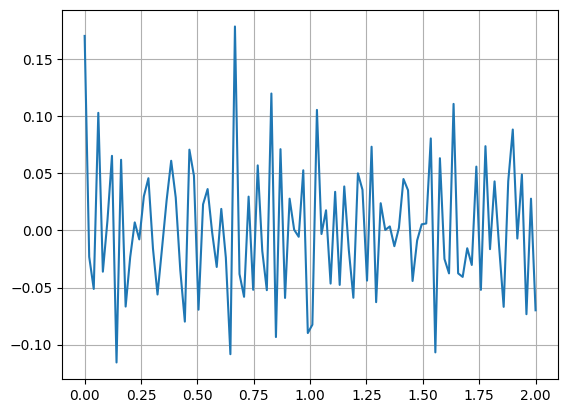

In [12]:
plt.plot(np.linspace(0,2,100), convolved_signal)
plt.grid(True)
plt.show()

In [13]:
def ssa(conv_signal: np.array):
    N = len(conv_signal)
    L = 20
    K = N - L + 1

    X = np.column_stack([conv_signal[i:i + L] for i in range(0, K)])

    d = np.linalg.matrix_rank(X)
    U, Sigma, VT = np.linalg.svd(X)

    main_comps = np.arange(0, 5)

    k = U.shape[1]
    n = U.shape[0] + VT.shape[1] - 1
    recon = np.zeros(n)
    counts = np.zeros(n)

    for i in main_comps:
        component_matrix = Sigma[i] * np.outer(U[:, i], VT[i, :])
        for j in range(component_matrix.shape[1]):
            recon[j:j + component_matrix.shape[0]] += component_matrix[:, j]
            counts[j:j + component_matrix.shape[0]] += 1

    return recon / counts

In [14]:
ssa_convolved_signal = ssa(convolved_signal)

In [15]:
rmse(convolved_signal, ssa_convolved_signal) * 300

15.452903886215905

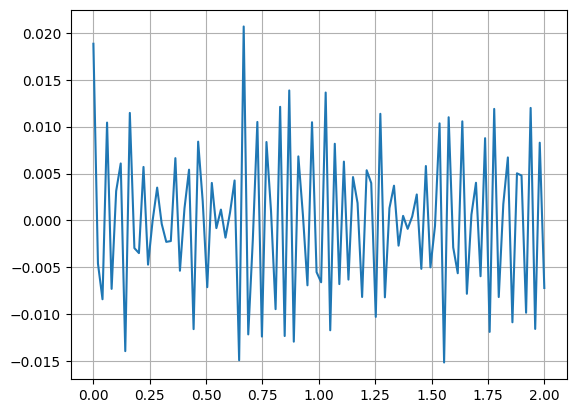

In [16]:
plt.plot(np.linspace(0,2,100), ssa_convolved_signal)
plt.grid(True)
plt.show()